In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from fcnn3_weight_init import NN

In [20]:
ds = pd.read_csv('./bank-churn.csv')

In [21]:
num1 = ds[ds['Exited']==1].__len__()
num0 = num1

In [22]:
ds = pd.concat([ds[ds['Exited']==1][:num1], ds[ds['Exited']==0][:num0]], axis=0)

In [23]:
ds = ds.sample(frac=1)

In [24]:
x = ds[['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = ds['Exited']

In [25]:
m = len(x)
tr_cv = round(0.8 * m)  # border between train and dev datasets
cv_test = round(0.9 * m) # border between dev and test datasets

X_train, X_cv, X_test = x[:tr_cv], x[tr_cv:cv_test], x[cv_test:]
y_train, y_cv, y_test = y[:tr_cv], y[tr_cv:cv_test], y[cv_test:]

In [26]:
def z_standartization(df, columns):
  mean_dict = {}
  sd_dict = {}
  new_df = df.copy()
  for col in columns:
    c = new_df[col]
    mean = c.mean()
    sd = c.std()
    new_df[col] = (c - mean) / sd

    mean_dict[col] = mean
    sd_dict[col] = sd
  return new_df, mean_dict, sd_dict

In [27]:
def z_standartization_means_sd_from_dict(df, mean_dict, sd_dict):
  new_df = df.copy()
  for col, mean in mean_dict.items():
    sd = sd_dict[col]

    new_df[col] = (new_df[col] - mean) / sd
  
  return new_df


In [28]:
columns_to_scale = ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [29]:
scaled_X_train, mean_X_train, sd_X_train = z_standartization(X_train, columns_to_scale)

scaled_X_cv = z_standartization_means_sd_from_dict(X_cv, mean_X_train, sd_X_train)
scaled_X_test = z_standartization_means_sd_from_dict(X_test, mean_X_train, sd_X_train)

In [30]:
scaled_X_train = np.array(scaled_X_train, dtype=np.float64).T
scaled_X_cv = np.array(scaled_X_cv, dtype=np.float64).T
scaled_X_test = np.array(scaled_X_test, dtype=np.float64).T

y_train, y_cv, y_test = np.array(y_train).reshape(1, -1), np.array(y_cv).reshape(1, -1), np.array(y_test).reshape(1, -1)

(array([29485.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 29646.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

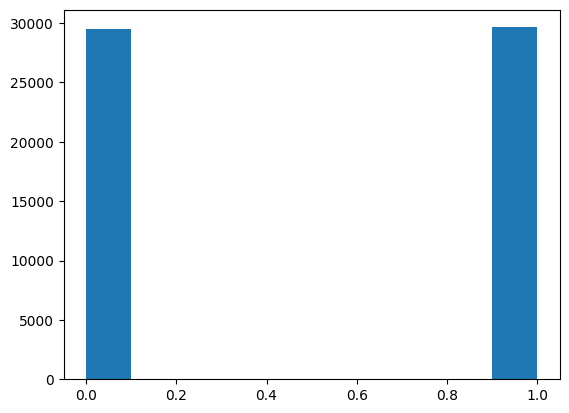

In [31]:
plt.hist(y_train.T)

In [46]:
model_1 = NN([7, 10, 10, 10, 10, 1])
J_history = []
J_cv_history = []

In [39]:
# model_1.load_json('./model_params.json')

In [47]:
epochs = 30

In [48]:
J_h, J_cv_h = model_1.backward(scaled_X_train, y_train, l_rate=0.1, epochs=epochs, keep_prob=1, X_cv=scaled_X_cv, Y_cv=y_cv)
J_history += J_h
J_cv_history += J_cv_h

----------------------------------
Changes in epoch 1:
J: [[0.73123925]] => [[0.72484101]]
MAE: [[0.49581864]] => [[0.49517015]]
Accuracy: 29051/59131 (49.13%) => 29398/59131 (49.72%)
J_cv: [[0.7653232]] => [[0.75337885]]
MAE_cv: [[0.49771667]] => [[0.49686784]]
Accuracy_cv: 3629/7392 (49.09%) => 3670/7392 (49.65%)
----------------------------------
Changes in epoch 2:
J: [[0.72484101]] => [[0.72081709]]
MAE: [[0.49517015]] => [[0.49439355]]
Accuracy: 29398/59131 (49.72%) => 29595/59131 (50.05%)
J_cv: [[0.75337885]] => [[0.74675266]]
MAE_cv: [[0.49686784]] => [[0.49655172]]
Accuracy_cv: 3670/7392 (49.65%) => 3670/7392 (49.65%)
----------------------------------
Changes in epoch 3:
J: [[0.72081709]] => [[0.71646669]]
MAE: [[0.49439355]] => [[0.49422402]]
Accuracy: 29595/59131 (50.05%) => 29620/59131 (50.09%)
J_cv: [[0.74675266]] => [[0.73922841]]
MAE_cv: [[0.49655172]] => [[0.49528899]]
Accuracy_cv: 3670/7392 (49.65%) => 3688/7392 (49.89%)
----------------------------------
Changes in e

KeyboardInterrupt: 

In [41]:
len(J_history), len(J_cv_history)

(3, 3)

Text(0, 0.5, 'J value')

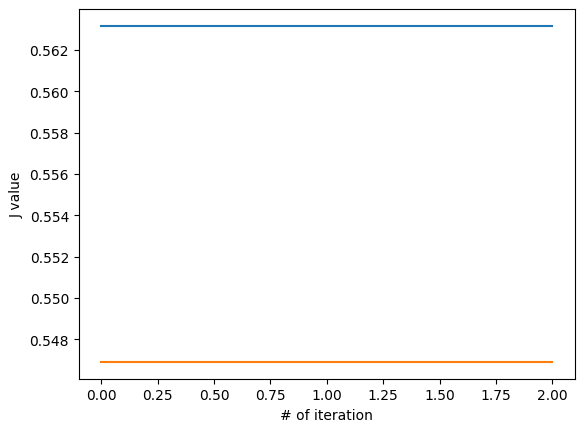

In [42]:
J_hist = [arr[0][0] for arr in J_history]
J_cv_hist = [arr[0][0] for arr in J_cv_history]
plt.plot(J_hist)
plt.plot(J_cv_hist)
plt.xlabel('# of iteration')
plt.ylabel('J value')

In [167]:
arr = np.random.rand(102459)

In [168]:
mb_size = 1000
mb_num = len(arr) // mb_size

In [169]:
mb_size*mb_num

102000

In [187]:
1000000 == int(1e+6)

True

In [175]:
arr[:mb_num*mb_size].reshape(mb_num, mb_size).shape

(102, 1000)

In [192]:
np.random.rand(2, 2).std()

0.2995648332047619

In [200]:
def softmax(arr):
  new_arr = []
  for el in arr:
    new_arr.append(np.exp(el)/np.exp(arr).sum())
  return new_arr

In [205]:
logits = np.array([0.5, -1, 0.1])
softmax(logits)

[0.528136412953437, 0.11784316240251767, 0.3540204246440453]